In [1]:
import heeps
from heeps.util.img_processing import get_radial_profile
from heeps.util.coord import disk_coord, mas2rms
import numpy as np
from astropy.io import fits
import os
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_offsets(name, rstar, nr=4):
    offsets = disk_coord(rstar, nr=4)
    print('noffsets = %s'%len(offsets))
    scatter(offsets[:,0],offsets[:,1])
    circ = Circle((0,0),rstar,linestyle=':',color='k',Fill=False)
    ax = gca()
    ax.add_artist(circ)
    ax.axis('equal')
    xlabel('x (mas)')
    ylabel('y (mas)')
    title('R = %s mas (%s) - %s pts'%(rstar,name,len(offsets)))
    savefig('offsets_%s_mas_%s_pts.png'%(rstar,len(offsets)))
    return offsets

In [3]:
def add_curve(xy, label, rel_flux=1):
    x = xy[0]
    y = xy[1] * rel_flux
    plot(x , y, label=label)
    legend()
    xlabel('angular separation [mas]')
    ylabel('relative flux')
    grid(True), grid(which='minor', linestyle=':')
    yscale('log')
    xlim(0, 200)
    ylim(1e-6, 1)

## Load raw contrast curves and PSFs

In [4]:
os.chdir('/Users/cdelacroix/INSTRUMENTS/METIS/heeps_analysis/output_files/raw_finite_size_RAVC')
# IMG
psf_IMG_no_error = fits.getdata('psf_IMG_no_error.fits')
cc_raw_IMG_no_error = fits.getdata('cc_raw_IMG_no_error.fits')
# RAVC, point-like
psf_RAVC_PS_no_error = fits.getdata('psf_RAVC_PS_no_error.fits')
cc_raw_RAVC_PS_no_error = fits.getdata('cc_raw_RAVC_PS_no_error.fits')
psf_RAVC_PS_scao = fits.getdata('psf_RAVC_PS_scao.fits')
cc_raw_RAVC_PS_scao = fits.getdata('cc_raw_RAVC_PS_scao.fits')
psf_RAVC_PS_point = fits.getdata('psf_RAVC_PS_point.fits')
cc_raw_RAVC_PS_point = fits.getdata('cc_raw_RAVC_PS_point.fits')
# RAVC, alpha Cen
psf_RAVC_AC_no_error = fits.getdata('psf_RAVC_AC_no_error.fits')
cc_raw_RAVC_AC_no_error = fits.getdata('cc_raw_RAVC_AC_no_error.fits')
psf_RAVC_AC_scao = fits.getdata('psf_RAVC_AC_scao.fits')
cc_raw_RAVC_AC_scao = fits.getdata('cc_raw_RAVC_AC_scao.fits')
psf_RAVC_AC_point = fits.getdata('psf_RAVC_AC_point.fits')
cc_raw_RAVC_AC_point = fits.getdata('cc_raw_RAVC_AC_point.fits')
# RAVC, pi1 Gru
psf_RAVC_PG_no_error = fits.getdata('psf_RAVC_PG_no_error.fits')
cc_raw_RAVC_PG_no_error = fits.getdata('cc_raw_RAVC_PG_no_error.fits')
psf_RAVC_PG_scao = fits.getdata('psf_RAVC_PG_scao.fits')
cc_raw_RAVC_PG_scao = fits.getdata('cc_raw_RAVC_PG_scao.fits')
psf_RAVC_PG_point = fits.getdata('psf_RAVC_PG_point.fits')
cc_raw_RAVC_PG_point = fits.getdata('cc_raw_RAVC_PG_point.fits')

## Figure point-like

Text(0.5,1,'point-like source (fullM1 C-basic, 30s 300ms)')

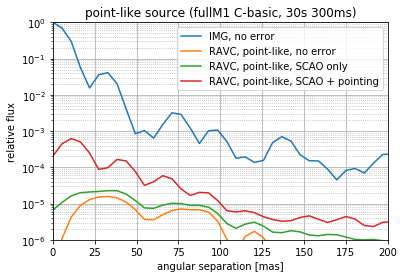

In [5]:
add_curve(cc_raw_IMG_no_error, 'IMG, no error')
add_curve(cc_raw_RAVC_PS_no_error, 'RAVC, point-like, no error', 0.1)
add_curve(cc_raw_RAVC_PS_scao, 'RAVC, point-like, SCAO only', 0.1)
add_curve(cc_raw_RAVC_PS_point, 'RAVC, point-like, SCAO + pointing', 0.1)
title('point-like source (fullM1 C-basic, 30s 300ms)')

## Figure alpha Cen

Text(0.5,1,'alpha Cen r=4.26 mas (fullM1 C-basic, 30s 300ms)')

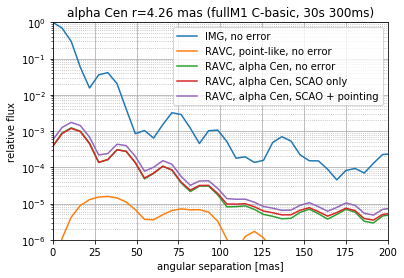

In [6]:
add_curve(cc_raw_IMG_no_error, 'IMG, no error')
add_curve(cc_raw_RAVC_PS_no_error, 'RAVC, point-like, no error', 0.1)
add_curve(cc_raw_RAVC_AC_no_error, 'RAVC, alpha Cen, no error', 0.1)
add_curve(cc_raw_RAVC_AC_scao, 'RAVC, alpha Cen, SCAO only', 0.1)
add_curve(cc_raw_RAVC_AC_point, 'RAVC, alpha Cen, SCAO + pointing', 0.1)
title('alpha Cen r=4.26 mas (fullM1 C-basic, 30s 300ms)')

## Figure pi1 Gru

Text(0.5,1,'pi1 Gru r=9.18 mas (fullM1 C-basic, 30s 300ms)')

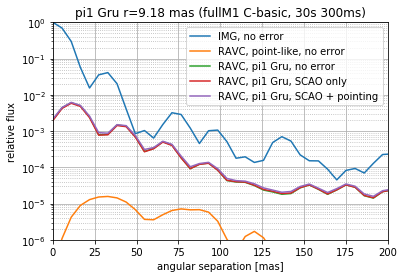

In [7]:
add_curve(cc_raw_IMG_no_error, 'IMG, no error')
add_curve(cc_raw_RAVC_PS_no_error, 'RAVC, point-like, no error', 0.1)
add_curve(cc_raw_RAVC_PG_no_error, 'RAVC, pi1 Gru, no error', 0.1)
add_curve(cc_raw_RAVC_PG_scao, 'RAVC, pi1 Gru, SCAO only', 0.1)
add_curve(cc_raw_RAVC_PG_point, 'RAVC, pi1 Gru, SCAO + pointing', 0.1)
title('pi1 Gru r=9.18 mas (fullM1 C-basic, 30s 300ms)')